In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score, f1_score

In [3]:
X_test=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionDataset_test.csv')
X_train=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionDataset_train.csv')
y_test=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionLabel_test.csv')
y_train=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionLabel_train.csv')

In [4]:
X=pd.concat([X_train,X_test])

In [5]:
y=pd.concat([y_train,y_test])

In [6]:
scaler= StandardScaler()

In [7]:
x_scaled=scaler.fit_transform(X)

In [8]:
pca=IncrementalPCA(n_components=7)

In [9]:
X_ipca_transformed=pca.fit_transform(x_scaled)

In [10]:
X_reconstructed = pca.inverse_transform(X_ipca_transformed)

In [11]:
reconstruction_error = np.sum(np.square(x_scaled - X_reconstructed), axis=1)

In [12]:
def find_best_threshold(reconstruction_errors, labels):
    best_threshold = None
    best_precision = -1 
    
    for percentile in range(1, 101):
        threshold = np.percentile(reconstruction_errors, percentile)
        predictions = reconstruction_errors > threshold
        current_precision = precision_score(labels, predictions, average='weighted', zero_division=0)
       
        if current_precision > best_precision:
            best_precision = current_precision
            best_threshold = threshold
        
    
    return best_threshold, best_precision


In [13]:
best_threshold, best_precision = find_best_threshold(reconstruction_error, y)
print(f"Best Threshold: {best_threshold}, Best Precision Score: {best_precision}")

Best Threshold: 1.2426146761791073, Best Precision Score: 0.8844473617641094


In [14]:
predictions = reconstruction_error > best_threshold

In [15]:
recall = recall_score(y, predictions, average='weighted', zero_division=0)
print(f"Recall: {recall}")

Recall: 0.705307258974281


In [16]:
f1 = f1_score(y, predictions, average='weighted', zero_division=0)
print(f"F1 Score: {f1}")

F1 Score: 0.7463455837504466


In [16]:
(pca.explained_variance_ratio_).sum()

0.7775221349466483

In [17]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

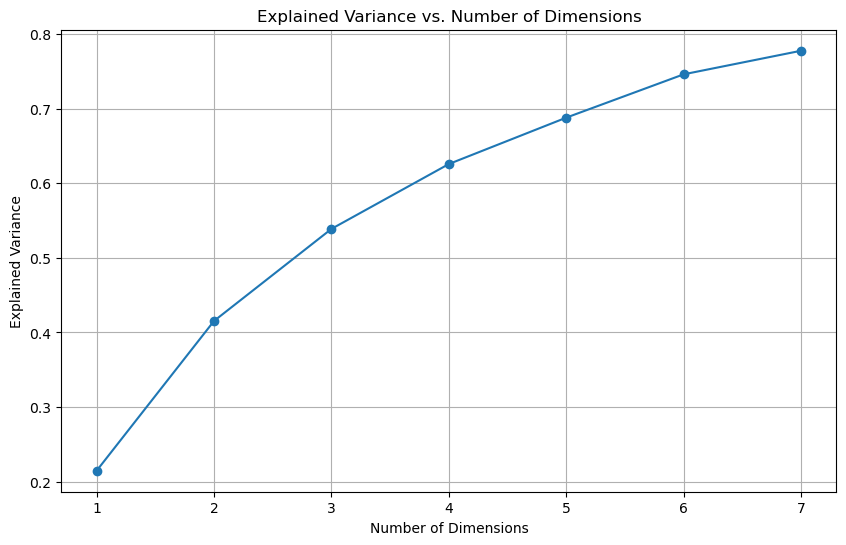

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1,8), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Dimensions')
plt.grid(True)
plt.show()


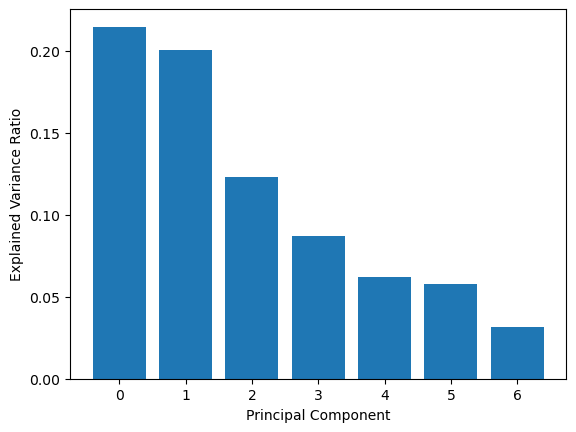

In [25]:
var_ratio=pca.explained_variance_ratio_
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [26]:
var_ratio

array([0.21475842, 0.20069967, 0.12335831, 0.0869173 , 0.06215565,
       0.05804799, 0.03158481])

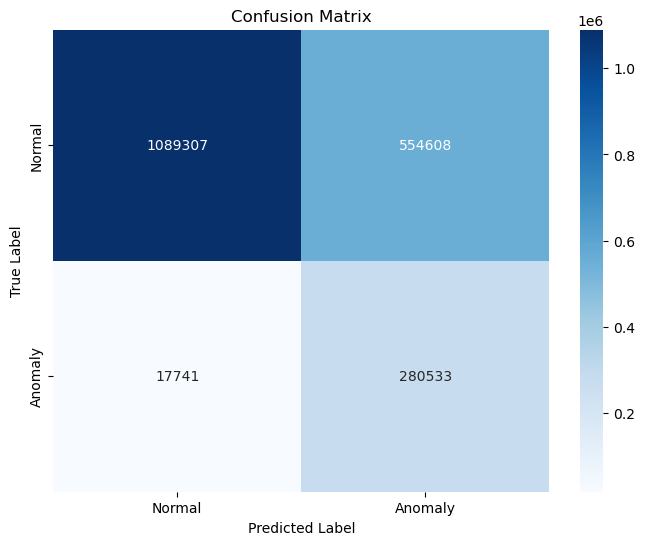

In [17]:
predictions = reconstruction_error > best_threshold
cm = confusion_matrix(y, predictions)
labels = ['Normal', 'Anomaly']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

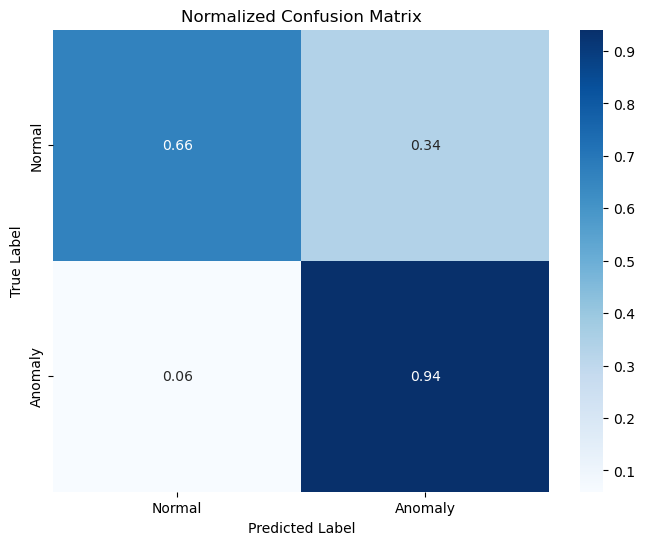

In [23]:
cm = confusion_matrix(y, predictions, normalize='true')  
labels = ['Normal', 'Anomaly']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

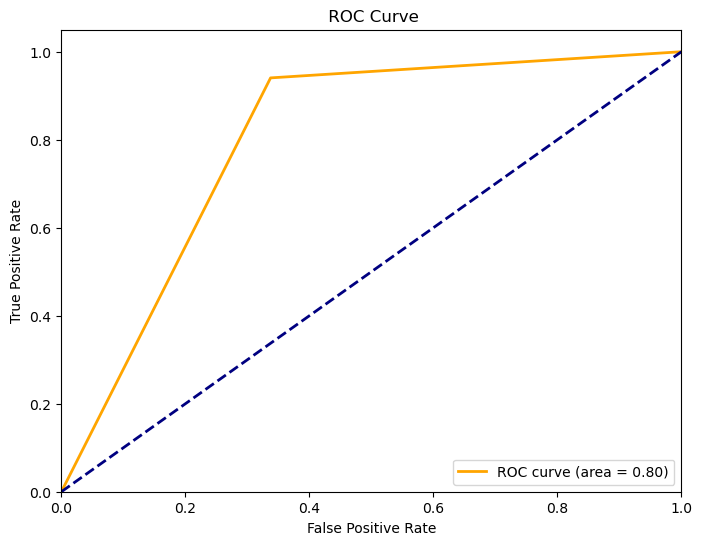

In [28]:
fpr, tpr, thresholds = roc_curve(y, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc="lower right")
plt.show()